▲리스트7.3：경계가 불명료하면서도 두 개의 영역으로 나눠진 데이터

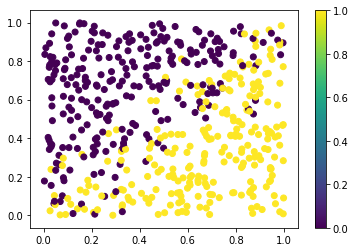

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_data = 500  # 데이터 수
X = np.zeros((n_data, 2))  # 입력
T = np.zeros((n_data))  # 정답

for i in range(n_data):
    # x、y좌표를 랜덤으로 설정한다
    x_rand = np.random.rand()  # x좌표
    y_rand = np.random.rand()  # y좌표
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    # x가 y보다 큰 영역에서는 정답 라벨을 1로 한다. 경계는 정규분포를 사용해서 조금 불명료하게
    if x_rand > y_rand + 0.2*np.random.randn(): 
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T)  # 정답 라벨을 색으로 나타낸다
plt.colorbar()
plt.show()

▲리스트7.4：로지스틱스 회귀에 의해 데이터를 분류한다

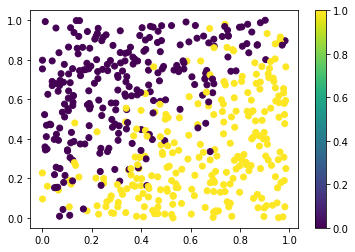

--- 확률 분포 ---


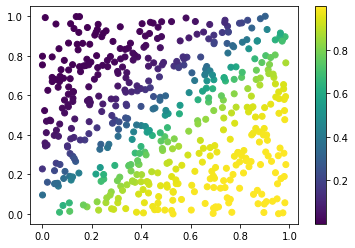

--- 오차의 추이 ---


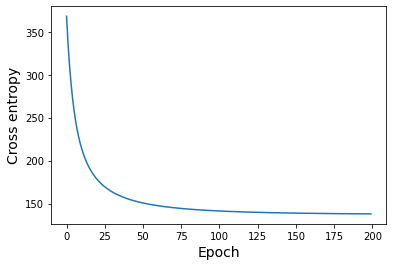

In [2]:
eta = 0.01  # 학습계수

# --- 출력을 계산(분류를 시행한다) ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param  # (식4)
    return 1/(1+np.exp(-u))  #  (식4)

# --- 교차 엔트로피 오차 ---
def cross_entropy(Y, T):
    delta = 1e-7  # 미소한 값
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta))  #  (식3)

# --- 각 파라미터의 구배 ---
def grad_a_params(X, T, a_params, b_param):  # a1, a2, ...의 구배
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):    
        for j in range(len(X)):    
            grad_a[i] += ( classify(X[j], a_params, b_param) - T[j] )*X[j, i]  # (식7)
    return grad_a
              
def grad_b_param(X, T, a_params, b_param):  # b의 구배
    grad_b = 0
    for i in range(len(X)):    
        grad_b += ( classify(X[i], a_params, b_param) - T[i] )  #  (식8)
    return grad_b

# --- 학습 ---
error_x = []  # 오차 기록용
error_y = []  # 오차 기록용
def fit(X, T, dim, epoch):  # dim: 입력의 차원 epoch: 반복하는 횟수
    
    # --- 파라미터의 초깃값을 설정 ---
    a_params = np.random.randn(dim)
    b_param = np.random.randn()
              
    # --- 파라미터 갱신 ---
    for i in range(epoch): 
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a  # （식2)
        b_param -= eta * grad_b  #（식2)
        
        Y = classify(X, a_params, b_param)
        error_x.append(i)  # 오차의 기록
        error_y.append(cross_entropy(Y, T))  # 오차의 기록

    return (a_params, b_param)

# --- 확률분포의 표시 --- 
a_params, b_param = fit(X, T, 2, 200)  # 학습
Y = classify(X, a_params, b_param)  # 학습 후의 파라미터를 사용한 분류
              
result_x = []  # x좌표
result_y = []  # y좌표
result_z = []  # 확률
for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])

print("--- 확률 분포 ---")
plt.scatter(result_x, result_y, c=result_z)  # 확률을 색으로 표시
plt.colorbar()
plt.show()

# --- 오차의 추이 --- 
print("--- 오차의 추이 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size=14)
plt.ylabel("Cross entropy", size=14)
plt.show()

#### □문제
　정답 라벨의 경계를 변경한 뒤, 로지스틱스 회귀의 코드를 실행해봅시다.

##### □정답 예
　자신이 상정한 결과로 돼 있는지를 확인합시다.